# Sondage vélo 2024

Un sondage a été effectué en Mai 2024 pour évaluer les pratiques actuelles et les besoins liés au vélo à l'IAS. Voici l'analyse des résultats.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from rich.jupyter import print

In [7]:
# Define useful functions

def pie_chart_plot(data, title):
    fig, ax = plt.subplots()
    
    def func(pct, allvals):
        absolute = int(pct/100.*np.sum(allvals))
        return "{:d}\n({:.1f}%)".format(absolute, pct)
    
    wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data), textprops=dict(color="w"))
    ax.legend(data.index, loc="best", bbox_to_anchor=(1, 0, 0.3, 1))
    fig.suptitle(title)

def print_text(data):
    for d in data[~data.isna()]:
        print(d)

In [8]:
data = pd.read_csv('IAS_SondageVeloIAS_5-22-2024_10_15.csv', index_col=0)
print(f"[bold]{data.shape[0]} personnes ont répondu au sondage.[/bold]")
#data.head()
#data.columns

47 personnes ont répondu au sondage.

In [9]:
columns_dict = {
    "1. What is your principal way of transportation to come to work?": "commute_mode",
    "2. Other : ": "alternative_mode",
    "3. dist": "distance",
    "4. Would you consider biking to work ?": "consider_biking",
    "5. Do you own a bicycle?": "own_bike",
    "6. Do you already come regularly to the IAS by bike/motorbike?": "regular_biker",
    "7. Where do you park it?": "parking_place",
    "8. Is your current location suitable for you?": "parking_satisfaction",
    "9. No : ": "parking_satisfaction_reason",
    "10. Have you ever had your bike/motorbike stolen around IAS?": "bike_stolen",
    "11. Are you afraid of your bike/motorbike being stolen around IAS buildings?": "stolen_fear",
    "12. What are the reasons that are holding you back / prevent you from using a bicycle?": "reasons_not_biking",
    "13. Would the existence of a parking shelter influence your choice to use the bicycle rather than another mode of transport?": "shelter_influence",
    "14. Is the fact that the shelter is secure (access closed by key or badge) decisive for you?": "shelter_security",
    "15. What would be the maximum distance (in m) from the entrance to the building for you to use the shelter?": "shelter_distance",
    "16. Would you like to park your motorbike in the shelter? (If relevant)": "shelter_motorbike",
    "17. Do lockers to keep your cycling gear (helmets, rain gear, repair tools) in the shelter seem useful to you?": "shelter_lockers",
    "18. Would you like to be able to charge your electric bike or lights inside the shelter?": "shelter_electricity",
    "19. Would you find a repair station with a few tools and a pump useful in the bike shed?": "shelter_tools",
    "20. Would you be interested in the possibility of using service electric bike, accessible to all IAS members?": "service_electric_bike",
    "21. How often would you consider using it?": "service_electric_bike_frequency",
    "22. Would you be interested in the possibility of using a service cargo bike to transport equipment?": "service_cargo_bike",
    "23. How often would you consider using it?": "service_cargo_bike_frequency"
    }
data.rename(columns=columns_dict, inplace=True)

## Déplacement domicile/travail´

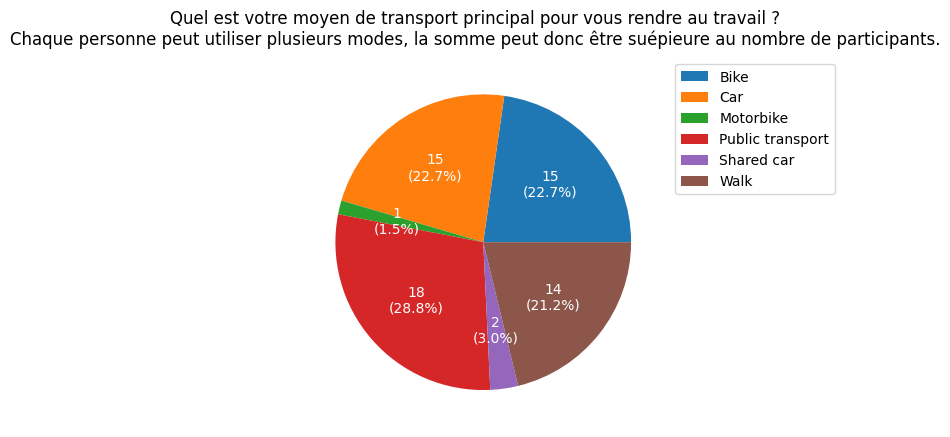

In [10]:
commute_mode = data['commute_mode'].str.get_dummies(";")
pie_chart_plot(commute_mode.sum(), "Quel est votre moyen de transport principal pour vous rendre au travail ?\nChaque personne peut utiliser plusieurs modes, la somme peut donc être suépieure au nombre de participants.")

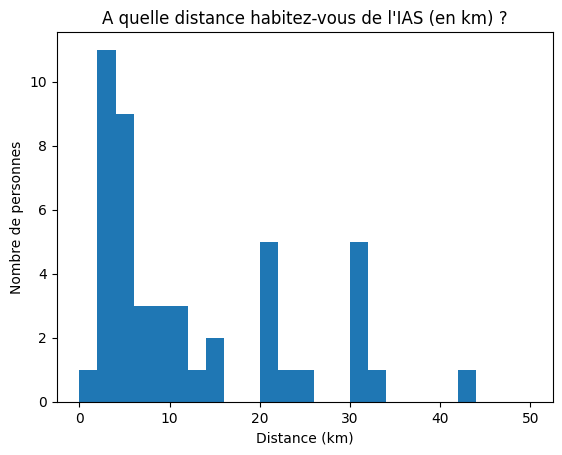

In [11]:
ax = data["distance"].plot(kind="hist", bins=np.linspace(0,50,26), title="A quelle distance habitez-vous de l'IAS (en km) ?", xlabel="Distance (km)", ylabel="Nombre de personnes")

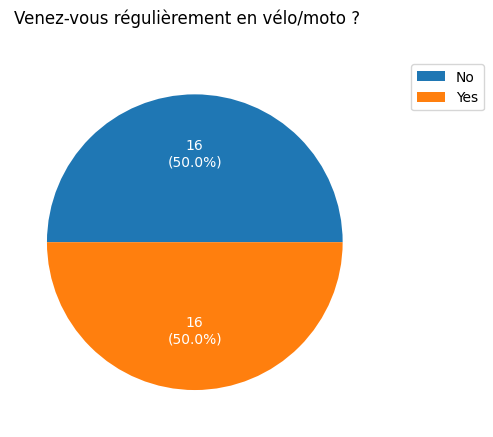

In [29]:
pie_chart_plot(data["regular_biker"].value_counts(), "Venez-vous régulièrement en vélo/moto ?")

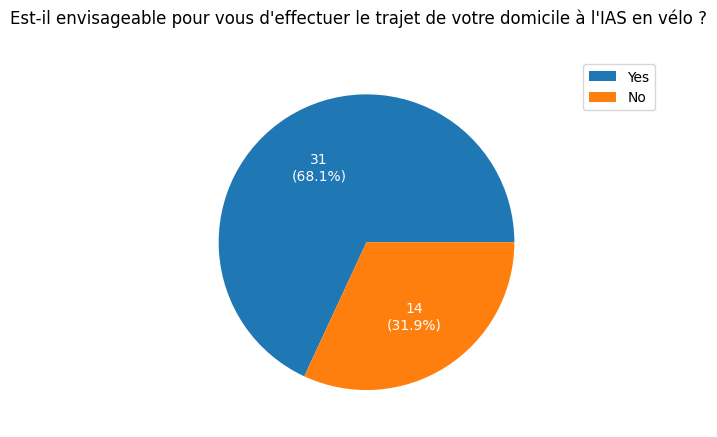

In [13]:
pie_chart_plot(data["consider_biking"].value_counts(), "Est-il envisageable pour vous d'effectuer le trajet de votre domicile à l'IAS en vélo ?")

In [14]:
print("[bold]Si vous souhaitez utiliser le vélo pour aller au travail, quelles sont les raisons qui vous retiennent/empêchent de le faire ?[/bold]\n")
print_text(data["reasons_not_biking"])

Si vous souhaitez utiliser le vélo pour aller au travail, quelles sont les raisons qui vous retiennent/empêchent de
le faire ?

C'est quand même trop loin de faire 60 km, aller-retour, tous les jours, à vélo! Ça prend du temps, on arrive tout 
en sueur, et quand il pleut... Par ailleurs, il n'y a nulle part où abriter son vélo à l'arrivée. Enfin, je dois me
rendre très souvent (presque tous les jours) sur le plateau: ça fragmente le déplacement, et donc le rallonge.

J'habite en haut de la monté d'Orsay et je n'ai pas de vélo

La marche à pied c'est mieux ! :)

Acheter un bon vélo et la motivation (ça grimpe)

je n'en ai pas

Not a place to put my bike at IAS

Il n'est pas en bon état

Je ne dispose pas de vélo

Je n'ai jamais fait la route et j'ai du mal à me motiver car c'est quand même 40 min de vélo

Le dénivellé important entre domicile et travail, et le coût d'un vélo électrique

## Parking

In [15]:
print("[bold]Où garez vous votre vélo/moto ?[/bold]\n")
print_text(data["parking_place"])

Où garez vous votre vélo/moto ?

Parking à vélo devant le 121, à côté du 209D

Sous la tonelle blanche entre le 121 et le 105

parking vélo à l'entrée

Préau extérieur

Locked on the balcony of IAS

Dans un lieux non adapté

Entrée cote RER Orsay

Devant mon bureau sur un poteau d'éclairage (ou dans mon bureau!)

accroché au grillage du box de stockage des bouteilles de gaz côté RER

Poteau de lampadaire près de l'iAS; abri à vélo du CSNSM quand il pleut

emplacement vélo devant le 209 (et à coté des poubelles): pas du tout pratique

A la rembarde de l'entrée principale de l'IAS

Actuelle emplacment vélo

Devant le labo

Sur le parc à vélo entre l'IAS et la station

Où je peux autour du labo (porte côté RER ou parking côté 209D)

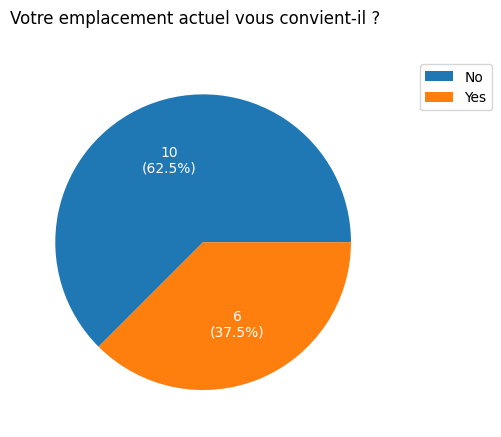

In [16]:
pie_chart_plot(data["parking_satisfaction"].value_counts(), "Votre emplacement actuel vous convient-il ?")

In [17]:
print("[bold]Pourquoi ?[/bold]")
print_text(data["parking_satisfaction_reason"])

Pourquoi ?

Pas sécurisé, un vélo a été volé récemment

il n'y pas assez de place, l'abri est vétuste donc pas bien protégé de la pluie, on ne peut pas garer des vélos 
modernes car ce n'est pas conçu pour des roues VTT

Worried about it getting stolen, cannot leave it overnight

Je ne suis pas sensé le mettre où je le met...

Pas d'attache

Mal sécurisé à l'extérieur et non autorisé dans le bureau

pas idéal mais... pour l'instant

Non abrité ou trop loin

L'abri vélo côté 209D n'est pas adapté aux motos

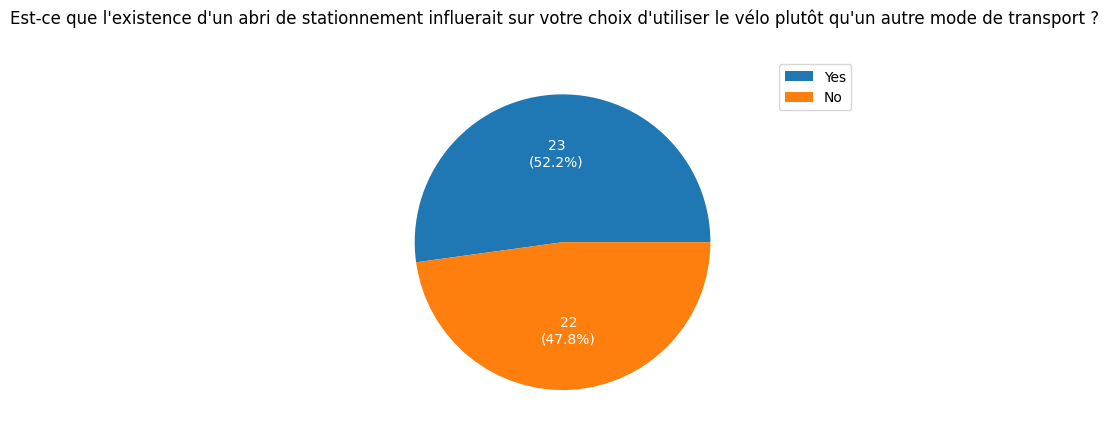

In [18]:
pie_chart_plot(data["shelter_influence"].value_counts(), "Est-ce que l'existence d'un abri de stationnement influerait sur votre choix d'utiliser le vélo plutôt qu'un autre mode de transport ?")

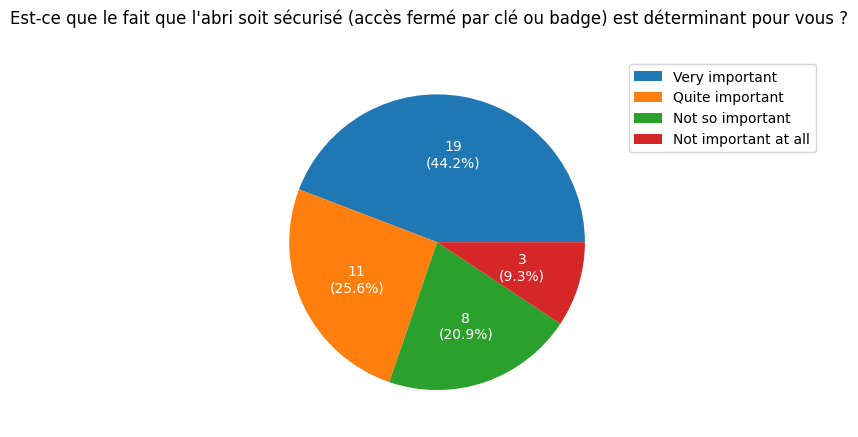

In [19]:
pie_chart_plot(data["shelter_security"].value_counts(), "Est-ce que le fait que l'abri soit sécurisé (accès fermé par clé ou badge) est déterminant pour vous ?")

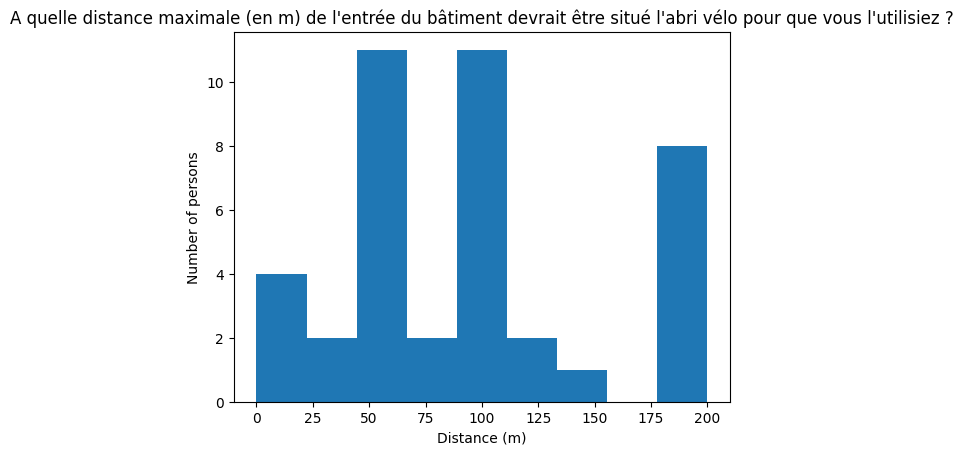

In [20]:
ax = data["shelter_distance"].plot(kind="hist", bins=np.linspace(0,200,10), title="A quelle distance maximale (en m) de l'entrée du bâtiment devrait être situé l'abri vélo pour que vous l'utilisiez ?", xlabel="Distance (m)", ylabel="Number of persons")

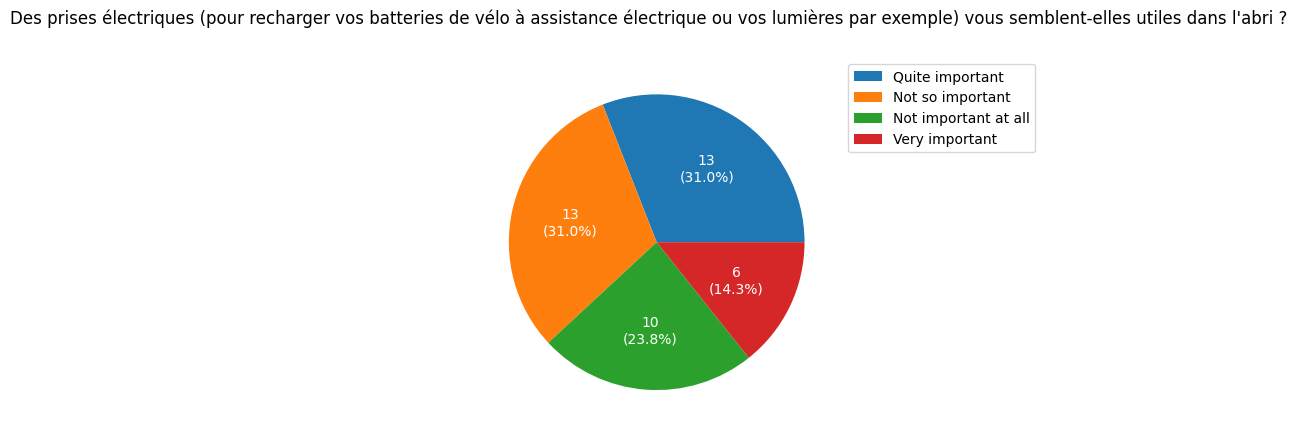

In [21]:
pie_chart_plot(data["shelter_electricity"].value_counts(), "Des prises électriques (pour recharger vos batteries de vélo à assistance électrique ou vos lumières par exemple) vous semblent-elles utiles dans l'abri ?")

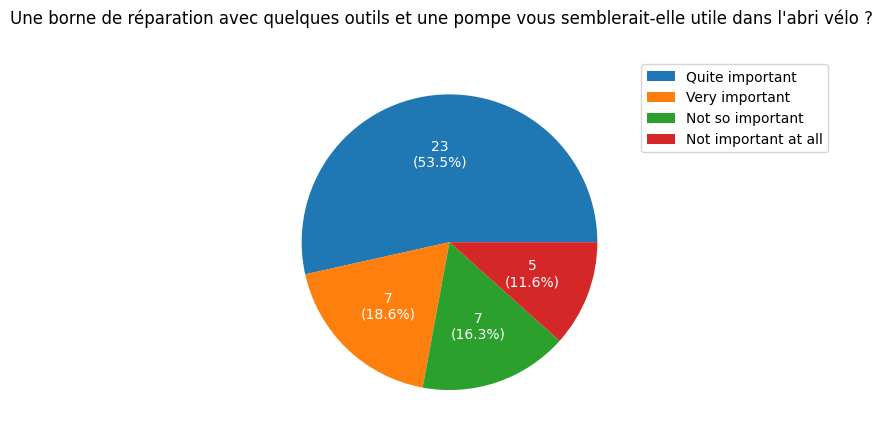

In [22]:
pie_chart_plot(data["shelter_tools"].value_counts(), "Une borne de réparation avec quelques outils et une pompe vous semblerait-elle utile dans l'abri vélo ?")

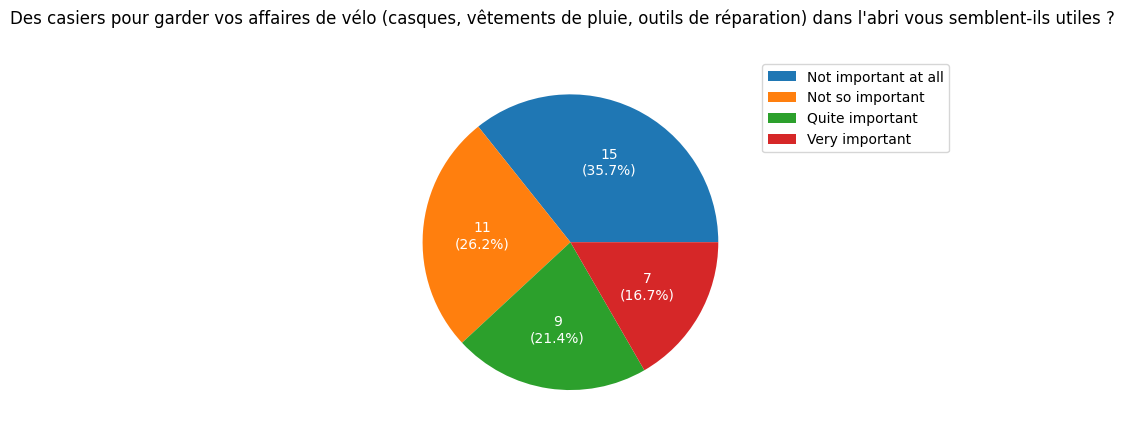

In [23]:
pie_chart_plot(data["shelter_lockers"].value_counts(), "Des casiers pour garder vos affaires de vélo (casques, vêtements de pluie, outils de réparation) dans l'abri vous semblent-ils utiles ?")

In [24]:
print(f"[bold]{data['shelter_motorbike'].value_counts()['Yes']} personnes ont exprimé leur intérêt pour pouvoir garer leur moto dans l'abri.[/bold]")

5 personnes ont exprimé leur intérêt pour pouvoir garer leur moto dans l'abri.

## Vélos de service

In [25]:
print(f"[bold]{data['service_electric_bike'].value_counts()['Yes']} personnes ont exprimé leur intérêt pour un vélo à assistance électrique de service.[/bold]")

24 personnes ont exprimé leur intérêt pour un vélo à assistance électrique de service.

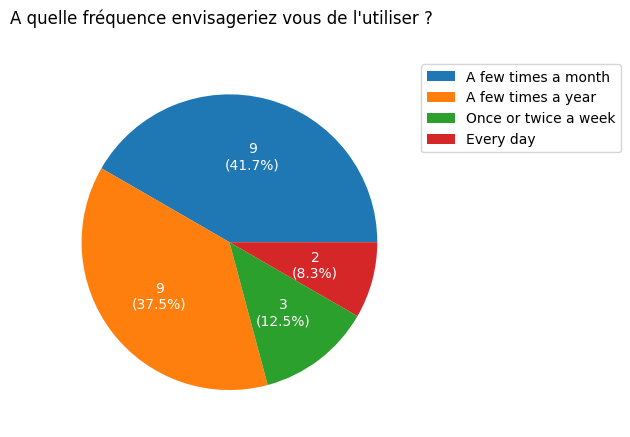

In [26]:
pie_chart_plot(data["service_electric_bike_frequency"].value_counts(), "A quelle fréquence envisageriez vous de l'utiliser ?")

In [27]:
print(f"{data['service_cargo_bike'].value_counts()['Yes']} personnes ont exprimé leur intérêt pour un vélo cargo à assistance électrique de service.")

8 personnes ont exprimé leur intérêt pour un vélo cargo à assistance électrique de service.

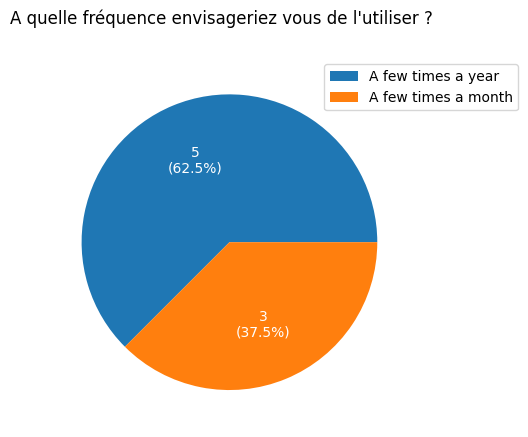

In [28]:
pie_chart_plot(data["service_cargo_bike_frequency"].value_counts(), "A quelle fréquence envisageriez vous de l'utiliser ?")